## K-NN (breast cancer dataset)

### load libraries

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# load data
df = load_breast_cancer()

In [6]:
print(df.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


### Explore dataset

In [7]:
# print(df)
# or

In [8]:
# print the features
count=0
for ii in df['feature_names']:
    count+=1
    print(f'{count} - {ii}')

1 - mean radius
2 - mean texture
3 - mean perimeter
4 - mean area
5 - mean smoothness
6 - mean compactness
7 - mean concavity
8 - mean concave points
9 - mean symmetry
10 - mean fractal dimension
11 - radius error
12 - texture error
13 - perimeter error
14 - area error
15 - smoothness error
16 - compactness error
17 - concavity error
18 - concave points error
19 - symmetry error
20 - fractal dimension error
21 - worst radius
22 - worst texture
23 - worst perimeter
24 - worst area
25 - worst smoothness
26 - worst compactness
27 - worst concavity
28 - worst concave points
29 - worst symmetry
30 - worst fractal dimension


In [9]:
# print the classes
print(df.target_names)

['malignant' 'benign']


In [10]:
# print initial few rows
print(f'{df.data[0:2]}')

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]


In [11]:
# print the class values of first 30 datapoints
print(df['target'][0:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


In [12]:
# print dimensions of the data
print(f'data shape:\n{df.data.shape}')

data shape:
(569, 30)


### Split dataset into training and test sets

In [13]:
# 85% training, 15% test
X_train, X_test, Y_train, Y_test = train_test_split(df['data'], df['target'], test_size=0.15)

In [14]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((483, 30), (86, 30), (483,), (86,))

### Arrange data as a dataframe

In [15]:
df_data = pd.DataFrame(df['data'])
df_data.columns = df['feature_names']

In [16]:
df_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Plot correlation matrix features

In [17]:
# number of features to plot
NUM_FEATURES = 10
ten_mean_features = list(df_data.columns[0:NUM_FEATURES])
ten_features_names = df.feature_names[0:NUM_FEATURES]

In [18]:
count=0
for ii in ten_features_names:
    count+=1
    print(count, '-', ii)

1 - mean radius
2 - mean texture
3 - mean perimeter
4 - mean area
5 - mean smoothness
6 - mean compactness
7 - mean concavity
8 - mean concave points
9 - mean symmetry
10 - mean fractal dimension


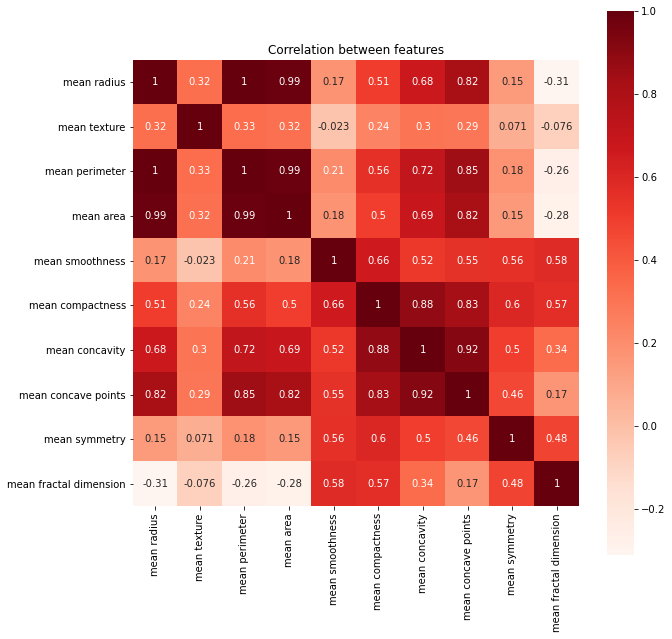

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df_data[ten_mean_features].corr(), annot=True, square=True, cmap='Reds')

plt.title('Correlation between features')
plt.show()

### Plot scatter matrix

In [20]:
# assign labels: 0 is 'benign', 1 is 'malignant'
append_color = {0: 'orange', 1: 'green'}
target_list = list(df['target'])
colors = list(map(lambda ii: append_color.get(ii), target_list))

How features separate Malignant(green) VS Benign(orange)


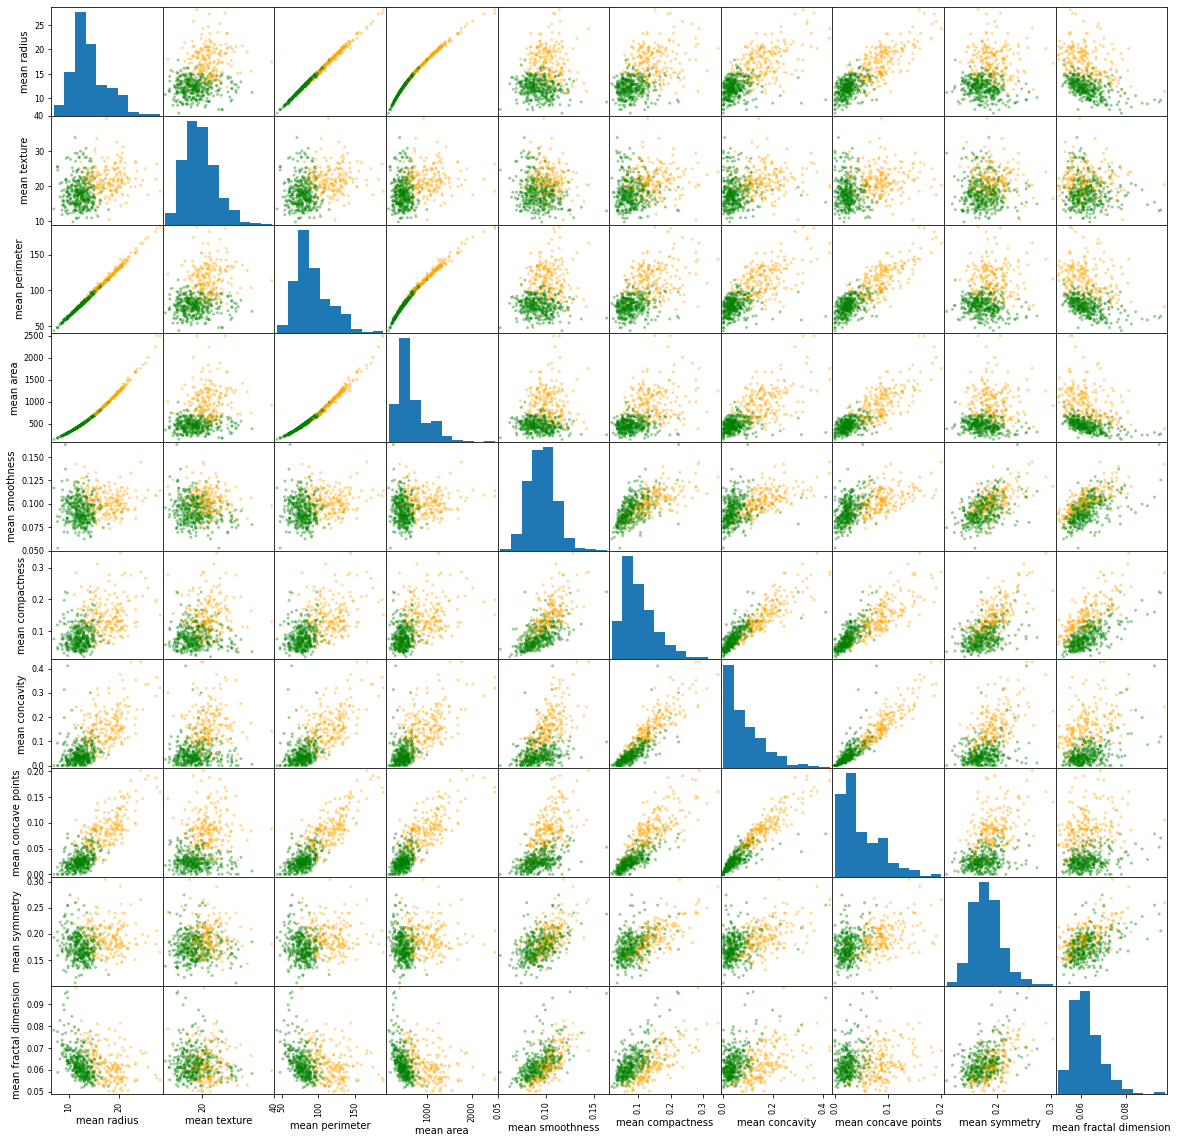

In [26]:
# plot
print('How features separate Malignant(green) VS Benign(orange)')
pd.plotting.scatter_matrix(df_data[ten_features_names], c=colors, 
                           alpha=0.4, figsize=(20,20))
plt.show()

### K-NN Classifier

In [114]:
# KNN Classifier with 1 neighbor
knn_1 = KNeighborsClassifier(n_neighbors=1)

In [115]:
# train the model on training dataset
knn_1.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [116]:
# predict on test dataset
y_pred = knn_1.predict(X_test)

In [117]:
# print accuracy of the model
print(f'knn_1 accuracy is: \n{round(metrics.accuracy_score(Y_test, y_pred)*100,1)}%')

knn_1 accuracy is: 
90.7%


In [118]:
# KNN Classifier with 5 neighbors
knn_5 = KNeighborsClassifier(n_neighbors=5)

In [119]:
# train the model on training dataset
knn_5.fit(X_train, Y_train)

KNeighborsClassifier()

In [120]:
# predict on test dataset
y_pred = knn_5.predict(X_test)

In [121]:
# print accuracy of the model
print(f'knn_5 accuracy is: \n{round(metrics.accuracy_score(Y_test, y_pred)*100,1)}%')

knn_5 accuracy is: 
93.0%


In [129]:
# KNN Classifier with 12 neighbors
knn_12 = KNeighborsClassifier(n_neighbors=12)
# train the model on training dataset
knn_12.fit(X_train, Y_train)
# predict on test dataset
y_pred = knn_12.predict(X_test)
# print accuracy of the model
print(f'knn_12 accuracy is: \n{round(metrics.accuracy_score(Y_test, y_pred)*100,1)}%')

knn_12 accuracy is: 
94.2%
